<h1>Assignment - 2 - Deep Learning</h1>
<br>
<h4>K Navneeth<br>
2020AIML517</h4>


<h5>1) Load the data</h5>

<h5>Importing Libraries</h5>

In [105]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import tensorflow as tf
import matplotlib.image as mpimg
from keras.callbacks import EarlyStopping
from  matplotlib import pyplot as plt
%matplotlib inline

In [106]:
path = os.getcwd()

In [107]:
IMG_WIDTH=224
IMG_HEIGHT=224
batch_size=3

train_dir = r''+path+'\\Sports_Dataset\\archive\\train'
test_dir =  r''+path+'\\Sports_Dataset\\archive\\test'
val_dir =  r''+path+'\\Sports_Dataset\\archive\\valid'

<h5>Generating Data from the Images</h5>

In [108]:
train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,validation_split=0.2)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
val_generator=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

train_images = train_generator.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=3,
    shuffle=False,
    seed=0,
    subset='training'
)

test_images = test_generator.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=3,
    shuffle=False
)

val_images = val_generator.flow_from_directory(
    directory=val_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=3,
    shuffle=False    
)

Found 8361 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.


<h5>Model Creation</h5>

In [109]:
def cnn(image_size, num_classes):
    clf = Sequential()
    clf.add(Conv2D(4, (3, 3), input_shape=image_size, activation='relu', padding='same'))
    clf.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
    clf.add(MaxPooling2D(pool_size = (2, 2)))
    clf.add(Flatten())
    clf.add(Dense(num_classes, activation = 'softmax'))
    clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return clf
    
model1 = cnn((224,224,3), 73)
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 4)       112       
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 4)       148       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 4)      0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 50176)             0         
                                                                 
 dense_7 (Dense)             (None, 73)                3662921   
                                                                 
Total params: 3,663,181
Trainable params: 3,663,181
Non-trainable params: 0
____________________________________________

<h5>Model Training</h5>

In [110]:
history1 = model1.fit(train_images, validation_data=val_images,epochs = 25)

Epoch 1/25
2787/2787 [==============================] - 204s 73ms/step - loss: 4.2869 - acc: 0.0636 - val_loss: 3.8251 - val_acc: 0.0904
Epoch 2/25
2787/2787 [==============================] - 202s 73ms/step - loss: 1.9671 - acc: 0.5430 - val_loss: 4.1136 - val_acc: 0.1616
Epoch 3/25
2787/2787 [==============================] - 203s 73ms/step - loss: 0.1846 - acc: 0.9651 - val_loss: 7.0314 - val_acc: 0.1370
Epoch 4/25
2787/2787 [==============================] - 203s 73ms/step - loss: 0.0398 - acc: 0.9961 - val_loss: 7.0039 - val_acc: 0.1425
Epoch 5/25
2787/2787 [==============================] - 202s 72ms/step - loss: 0.0147 - acc: 0.9989 - val_loss: 9.7073 - val_acc: 0.1233
Epoch 6/25
2787/2787 [==============================] - 203s 73ms/step - loss: 0.0213 - acc: 0.9982 - val_loss: 7.5219 - val_acc: 0.1507
Epoch 7/25
2787/2787 [==============================] - 202s 72ms/step - loss: 0.0145 - acc: 0.9992 - val_loss: 6.8248 - val_acc: 0.1425
Epoch 8/25
2787/2787 [===================

<h5>Accuracy and Loss of Training</h5>

In [111]:
print('Training Loss:',history.history['loss'][-1])
print('Training Accuracy:',history.history['acc'][-1])
print('Validation Loss',history.history['val_loss'][-1])
print('Validation Accuracy',history.history['val_acc'][-1])

Training Loss: 0.006219192408025265
Training Accuracy: 0.9991627931594849
Validation Loss 6.653650283813477
Validation Accuracy 0.18904109299182892


<h5>Plotting Training and Validation Loss</h5>

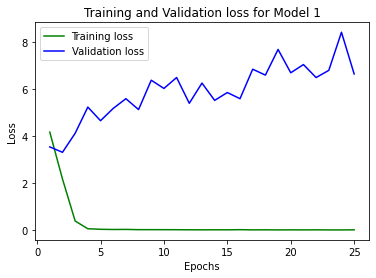

In [135]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss for Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h5>Plotting Training and Validation Accuracy</h5>

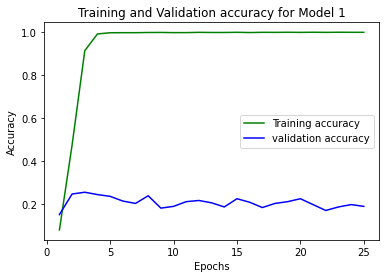

In [134]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy for Model 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h5>Running the model on Test Data</h5>

In [114]:
testLoss,testAcc = model1.evaluate(test_images)

122/122 [==============================] - 3s 24ms/step - loss: 6.6783 - acc: 0.1096


In [115]:
print('Testing Loss:',testLoss)
print('Testing Accuracy:',testAcc)

Testing Loss: 6.678264141082764
Testing Accuracy: 0.10958904027938843


<h5>Improvised Model</h5>

In [116]:
def cnn2(image_size, num_classes):
    clf = Sequential()
    clf.add(Conv2D(4, (3, 3), input_shape=image_size, activation='relu', padding='same'))
    clf.add(MaxPooling2D(pool_size = (2, 2)))
    clf.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
    clf.add(MaxPooling2D(pool_size = (3, 3)))
    clf.add(Conv2D(12, (3, 3), activation='relu', padding='same'))
    clf.add(MaxPooling2D(pool_size = (4, 4)))
    clf.add(Flatten())
    clf.add(Dense(num_classes, activation = 'softmax'))
    clf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return clf
    
model2 = cnn2((224,224,3), 73)
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 224, 224, 4)       112       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 112, 112, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 8)       296       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 37, 37, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 37, 37, 12)        876       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 9, 9, 12)        

In [125]:
#es = EarlyStopping(monitor='val_loss', verbose=1)
#callbacks=[es]
history2 = model2.fit(train_images, validation_data=val_images,epochs = 25)

Epoch 1/25
2787/2787 [==============================] - 101s 36ms/step - loss: 1.3798 - acc: 0.6234 - val_loss: 3.2906 - val_acc: 0.3178
Epoch 2/25
2787/2787 [==============================] - 102s 37ms/step - loss: 1.0646 - acc: 0.7101 - val_loss: 3.5120 - val_acc: 0.2849
Epoch 3/25
2787/2787 [==============================] - 102s 36ms/step - loss: 0.8234 - acc: 0.7705 - val_loss: 4.0088 - val_acc: 0.3041
Epoch 4/25
2787/2787 [==============================] - 102s 37ms/step - loss: 0.6338 - acc: 0.8239 - val_loss: 4.6030 - val_acc: 0.2822
Epoch 5/25
2787/2787 [==============================] - 102s 36ms/step - loss: 0.4800 - acc: 0.8656 - val_loss: 5.6011 - val_acc: 0.2740
Epoch 6/25
2787/2787 [==============================] - 102s 36ms/step - loss: 0.3638 - acc: 0.8964 - val_loss: 6.2432 - val_acc: 0.2767
Epoch 7/25
2787/2787 [==============================] - 102s 37ms/step - loss: 0.2809 - acc: 0.9189 - val_loss: 7.1834 - val_acc: 0.2877
Epoch 8/25
2787/2787 [===================

<h5> Metrics of Model 2 </h5>

In [126]:
print('Training Loss:',history2.history['loss'][-1])
print('Training Accuracy:',history2.history['acc'][-1])
print('Validation Loss',history2.history['val_loss'][-1])
print('Validation Accuracy',history2.history['val_acc'][-1])

Training Loss: 0.07592085748910904
Training Accuracy: 0.9767970442771912
Validation Loss 14.814818382263184
Validation Accuracy 0.2657534182071686


In [127]:
testLoss,testAcc = model2.evaluate(test_images)

122/122 [==============================] - 2s 14ms/step - loss: 14.3058 - acc: 0.2849


In [128]:
print('Testing Loss:',testLoss)
print('Testing Accuracy:',testAcc)

Testing Loss: 14.30584716796875
Testing Accuracy: 0.2849315106868744


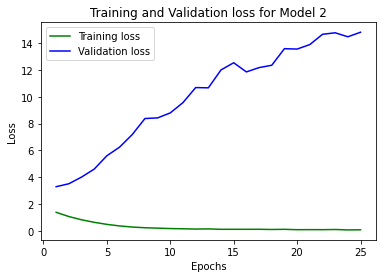

In [129]:
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss for Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

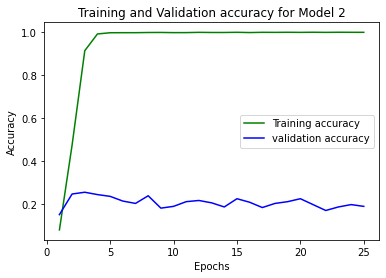

In [130]:
loss_train = history2.history['acc']
loss_val = history2.history['val_acc']
epochs = range(1,26)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy for Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()